In [1]:
from google.colab import files
uploaded = files.upload()


Saving Company_Data.csv to Company_Data (1).csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv(r'Company_Data.csv')

In [4]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
data.isnull().sum()


Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [9]:
#transforming Categorical data to Numerical
from sklearn.preprocessing import LabelEncoder

colname=['ShelveLoc','Urban','US']

le=LabelEncoder()

for x in colname:
    data[x]=le.fit_transform(data[x])

In [10]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int64
Age              int64
Education        int64
Urban            int64
US               int64
dtype: object

In [11]:
data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
5,10.81,124,113,13,501,72,0,78,16,0,1
6,6.63,115,105,0,45,108,2,71,15,1,0
7,11.85,136,81,15,425,120,1,67,10,1,1
8,6.54,132,110,0,108,124,2,76,10,0,0
9,4.69,132,113,0,131,124,2,76,17,0,1


<Axes: >

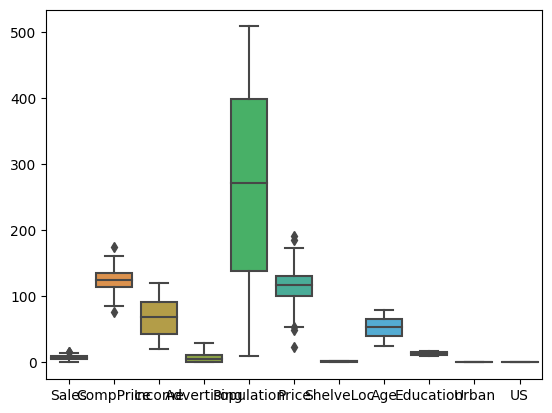

In [12]:
sns.boxplot(data)

In [13]:

# Define a function to remove outliers using IQR method
def remove_outliers_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return column[(column >= lower_bound) & (column <= upper_bound)]

# Apply the remove_outliers_iqr function to all numerical columns
num_cols = data.select_dtypes(include=[np.number]).columns
for col in num_cols:
    data[col] = remove_outliers_iqr(data[col])



In [14]:
data1 = data

<Axes: >

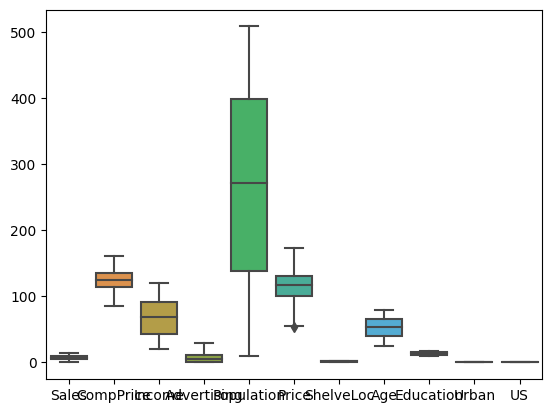

In [15]:
sns.boxplot(data1)

<Axes: >

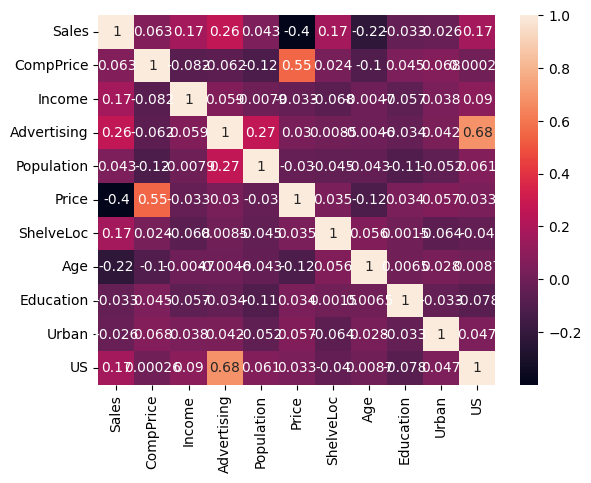

In [16]:
sns.heatmap(data1.corr(), annot = True)

In [17]:
data1.isnull().sum()

Sales          2
CompPrice      2
Income         0
Advertising    0
Population     0
Price          5
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [18]:

# Replace null values in a column with the mean of the column
data1['Sales'] = data1['Sales'].fillna(data1['Sales'].mean())



In [19]:
# Replace null values in a column with the mean of the column
data1['CompPrice'] = data1['CompPrice'].fillna(data1['CompPrice'].mean())

In [20]:
# Replace null values in a column with the mean of the column
data1['Price'] = data1['Price'].fillna(data1['Price'].mean())

In [21]:
data1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [22]:
data1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138.0,73,11,276,120.0,0,42,17,1,1
1,11.22,111.0,48,16,260,83.0,1,65,10,1,1
2,10.06,113.0,35,10,269,80.0,2,59,12,1,1
3,7.40,117.0,100,4,466,97.0,2,55,14,1,1
4,4.15,141.0,64,3,340,128.0,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138.0,108,17,203,128.0,1,33,14,1,1
396,6.14,139.0,23,3,37,120.0,2,55,11,0,1
397,7.41,162.0,26,12,368,159.0,2,40,18,1,1
398,5.94,100.0,79,7,284,95.0,0,50,12,1,1


In [23]:
Y = data1.iloc[:, 0]

In [24]:
Y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [25]:
X = data1.iloc[:, 1:]

In [26]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138.0,73,11,276,120.0,0,42,17,1,1
1,111.0,48,16,260,83.0,1,65,10,1,1
2,113.0,35,10,269,80.0,2,59,12,1,1
3,117.0,100,4,466,97.0,2,55,14,1,1
4,141.0,64,3,340,128.0,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138.0,108,17,203,128.0,1,33,14,1,1
396,139.0,23,3,37,120.0,2,55,11,0,1
397,162.0,26,12,368,159.0,2,40,18,1,1
398,100.0,79,7,284,95.0,0,50,12,1,1


In [27]:
# Split the data into independent and dependent variables
X = data1.iloc[:, 1:]
Y = data1.iloc[:, 0]

In [28]:
X.shape

(400, 10)

In [29]:
Y.shape

(400,)

In [30]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [31]:
print(X)

[[ 0.87344693  0.15536099  0.65717702 ...  1.18444912  0.64686916
   0.74188112]
 [-0.93643751 -0.73906037  1.40995711 ... -1.4901134   0.64686916
   0.74188112]
 [-0.802372   -1.20415947  0.506621   ... -0.72595268  0.64686916
   0.74188112]
 ...
 [ 2.4822331  -1.52615116  0.80773304 ...  1.56652948  0.64686916
   0.74188112]
 [-1.67379784  0.37002211  0.05495295 ... -0.72595268  0.64686916
   0.74188112]
 [ 0.6053159  -1.13260576 -0.99893918 ...  0.80236876  0.64686916
   0.74188112]]


In [45]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=10)  


In [47]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(280, 10)
(280,)
(120, 10)
(120,)


In [51]:
#predicting using the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

model_DecisionTree=RandomForestRegressor(n_estimators=100,random_state=10,
                                        max_depth=5,min_samples_leaf=5)
model_DecisionTree.fit(X_train,Y_train)
#fit the model on the data and predict the values
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)

[ 8.21942156  6.83982384  9.80890031  6.00842098  9.14288165  5.68647728
  7.82966307  7.1440465   6.97153949  8.02304103  6.72044652 10.64578298
  6.31248594  7.99319892  6.38265716  6.71110654  5.04683862  5.88789573
  6.79794061  9.14787741  4.88968195  8.60087161  8.47710282  4.79524493
  7.0601251   5.17673678  8.92916906  6.65973981  7.42416365  5.24371705
 10.39689843  6.84425763  7.18523305  9.96381233  7.45955633  6.13537425
  9.45011048  7.03927834  8.06437237  8.5877852  10.37610854  4.84315492
  8.69596985  7.25046402  5.78618663  7.4744748   8.12354798  7.87487295
  7.56449548  5.7046462   5.13155004  8.58924391  3.95544698 10.12919059
  7.65621472 11.50512462  8.22965718  7.32593348  8.44991127 10.12627218
  7.59824138  5.07111284  5.86515671  6.40199854  4.81739348  8.33893691
  9.07315106  8.51943575  7.49631858  8.39783474  7.6096956   4.94823169
  4.2668103   7.98249015  3.79543497 10.11727939  4.47039262  6.79289136
  9.18202973  7.30930336  9.14852008  9.05234246  9

In [52]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.4874097902141533
RMSE: 1.846988339741333
Adj R-square: 0.4742326639985789


In [59]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
data_new = data1
X = data_new.iloc[:, 1:].values # Independent variables
y = data_new.iloc[:, 0].values # Dependent variable


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [65]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=0)


In [66]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [67]:
# Evaluate the Random Forest model
y_pred = rf.predict(X_test)

In [68]:
print(y_pred)

[ 6.6133      7.1642      7.526       3.5061      6.58403844  6.7191
  7.9247      6.4981      4.7215      6.3262      6.8805      5.0831
  4.9985     11.55360754  4.4358      6.0867     11.28085377  7.16453844
  4.9523      5.8316      6.2986      8.32673844 10.4062      9.2429
  6.3097      7.90733844  4.6534      5.3903      7.3827      6.5955
  7.4677      9.4255691   8.592       6.085       5.5376      7.9864
  6.3191      6.1794      4.9272     10.58853844  7.4147      8.4234
  6.2606     10.36153065  4.7097      5.2123      7.6306      7.1611
 10.4528691   9.2908      4.5176     10.03865377 11.3927691   7.9993
  4.6511      9.309       4.7727      5.6709      9.66423844  3.6589
  6.7618     10.65377663  5.7565      5.6783      6.5161      7.3695
  9.1549      7.9012      8.9557      6.3738     10.77131533  7.2792
  9.79389221  6.6954      8.1116     11.2354      9.22671533  9.70153844
  8.7792     10.29263065  2.5661      9.37643844  5.8834      4.0386
  8.7104     10.5694      

In [69]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

R2 Score:  0.6319747122592883
Mean Squared Error:  2.4740195325214502


In [72]:
# Tune the Random Forest model
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

Best parameters:  {'max_features': 'sqrt', 'n_estimators': 300}


In [73]:
# Make predictions with the Random Forest model
rf_best = RandomForestRegressor(n_estimators=best_params['n_estimators'], 
                                  max_features=best_params['max_features'], 
                                  criterion='squared_error', random_state=0)
rf_best.fit(X_train, y_train)

y_pred_best = rf_best.predict(X_test)

print("R2 Score with best parameters: ", r2_score(y_test, y_pred_best))
print("Mean Squared Error with best parameters: ", mean_squared_error(y_test, y_pred_best))

R2 Score with best parameters:  0.572002299304081
Mean Squared Error with best parameters:  2.877179114229759


In [74]:
# Save the Random Forest model
import pickle
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_best, file)


In [75]:
import pickle

# Load the model from the file
with open('rf_model.pkl', 'rb') as file:
    rf_loaded = pickle.load(file)

# Print some information about the loaded model
print('Model loaded successfully.')
print('Number of estimators:', rf_loaded.n_estimators)
print('Maximum depth:', rf_loaded.max_depth)


Model loaded successfully.
Number of estimators: 300
Maximum depth: None
